<a href="https://colab.research.google.com/github/CocoPig1028/ML_Note/blob/main/WineDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
wine.head()
#wine목록의 첫번재 다섯개 출력

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()
# 데이터프레임(와인)의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인
# non-null Count가 모두 6497 -> 누락 데이터가 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
#describe() -> 열에 대한 간략한 통계를 출력
wine.describe()
# 1사분위수, 2사분위수(중간값), 3사분위수 , 최댓값, 최솟값, 표준편차, 평균

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine[['class']].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [9]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [11]:
# StandardScaler를 이용하여 훈련세트 전처리, 테스트 세트 변환
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 점수가 너무 낮아 과소적합
# 규제 매개 변수 C 변경 or solver 매개변수에서 다른 알고리즘 선택 or 다항 특성을 만들어 추가

0.7808350971714451
0.7776923076923077


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# 로지스틱 회귀가 학습한 계수와 절편 출력
print(lr.coef_, lr.intercept_)
# 도수와 당도가 높을수록 화이트와인 가능성 높음
# PH가 높을수록 레드와인일 가능성 높음
# 해석하기 어려움

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 과대적합이 발생

0.996921300750433
0.8592307692307692


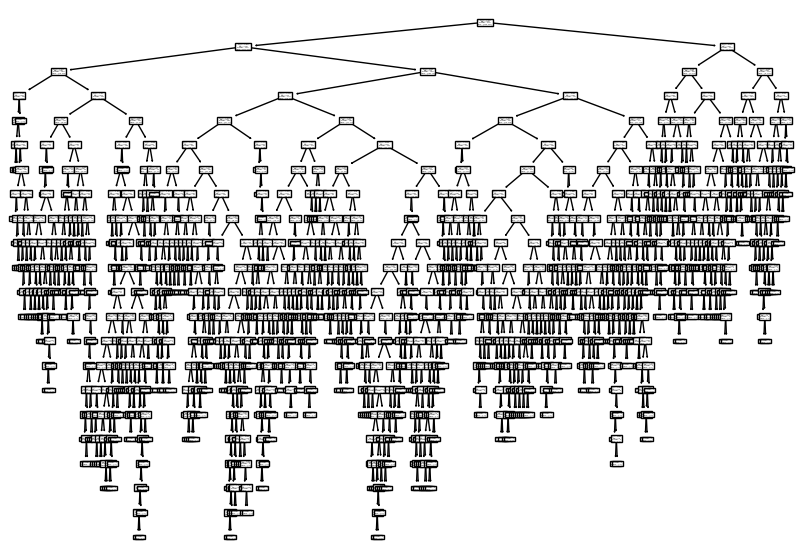

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

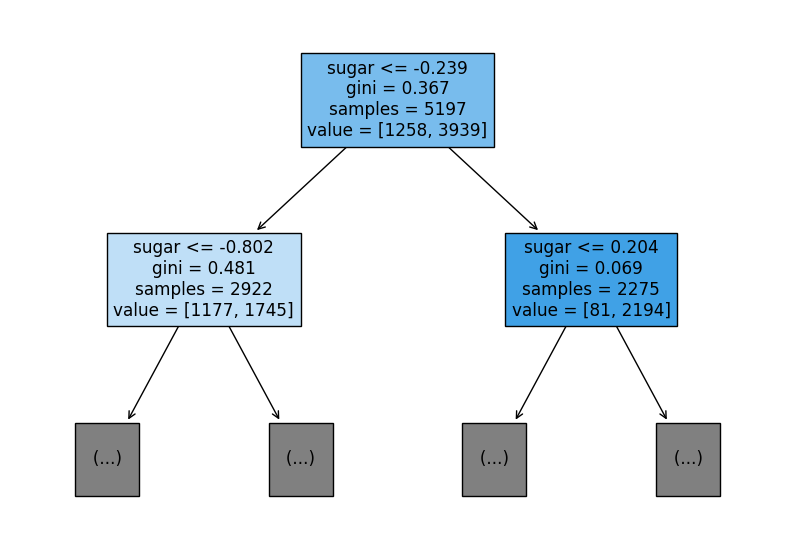

In [21]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()
# gini = 지니 불순도
# 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)
# 지니 불순도 = 0 -> 순수 노드
# 지니 불순도 = 0.5 -> 두 클래스의 비율이 정확히 1/2라면 지니 불순도는 최악
3# 정보이득(부모와 자식 노드 사이의 불순도 차이) = 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘풀 수) X 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) X 오른쪽 노드 불순도

In [22]:
# 사이킷런에서는 엔트로피 불순도를 사용가능
# DecisionTreeClassifier -> criterion='entropy' 지정
# 엔트로피 불순도도 노드의 클래스 비율을 사용
# 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱함
# 가지치기 -> DecisionTreeClassifier 클래스의 max_depth 매개변수를 지정
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 훈련세트의 성능은 낮아졌지만 테스트 세트의 성능은 거의 그대로

0.8454877814123533
0.8415384615384616


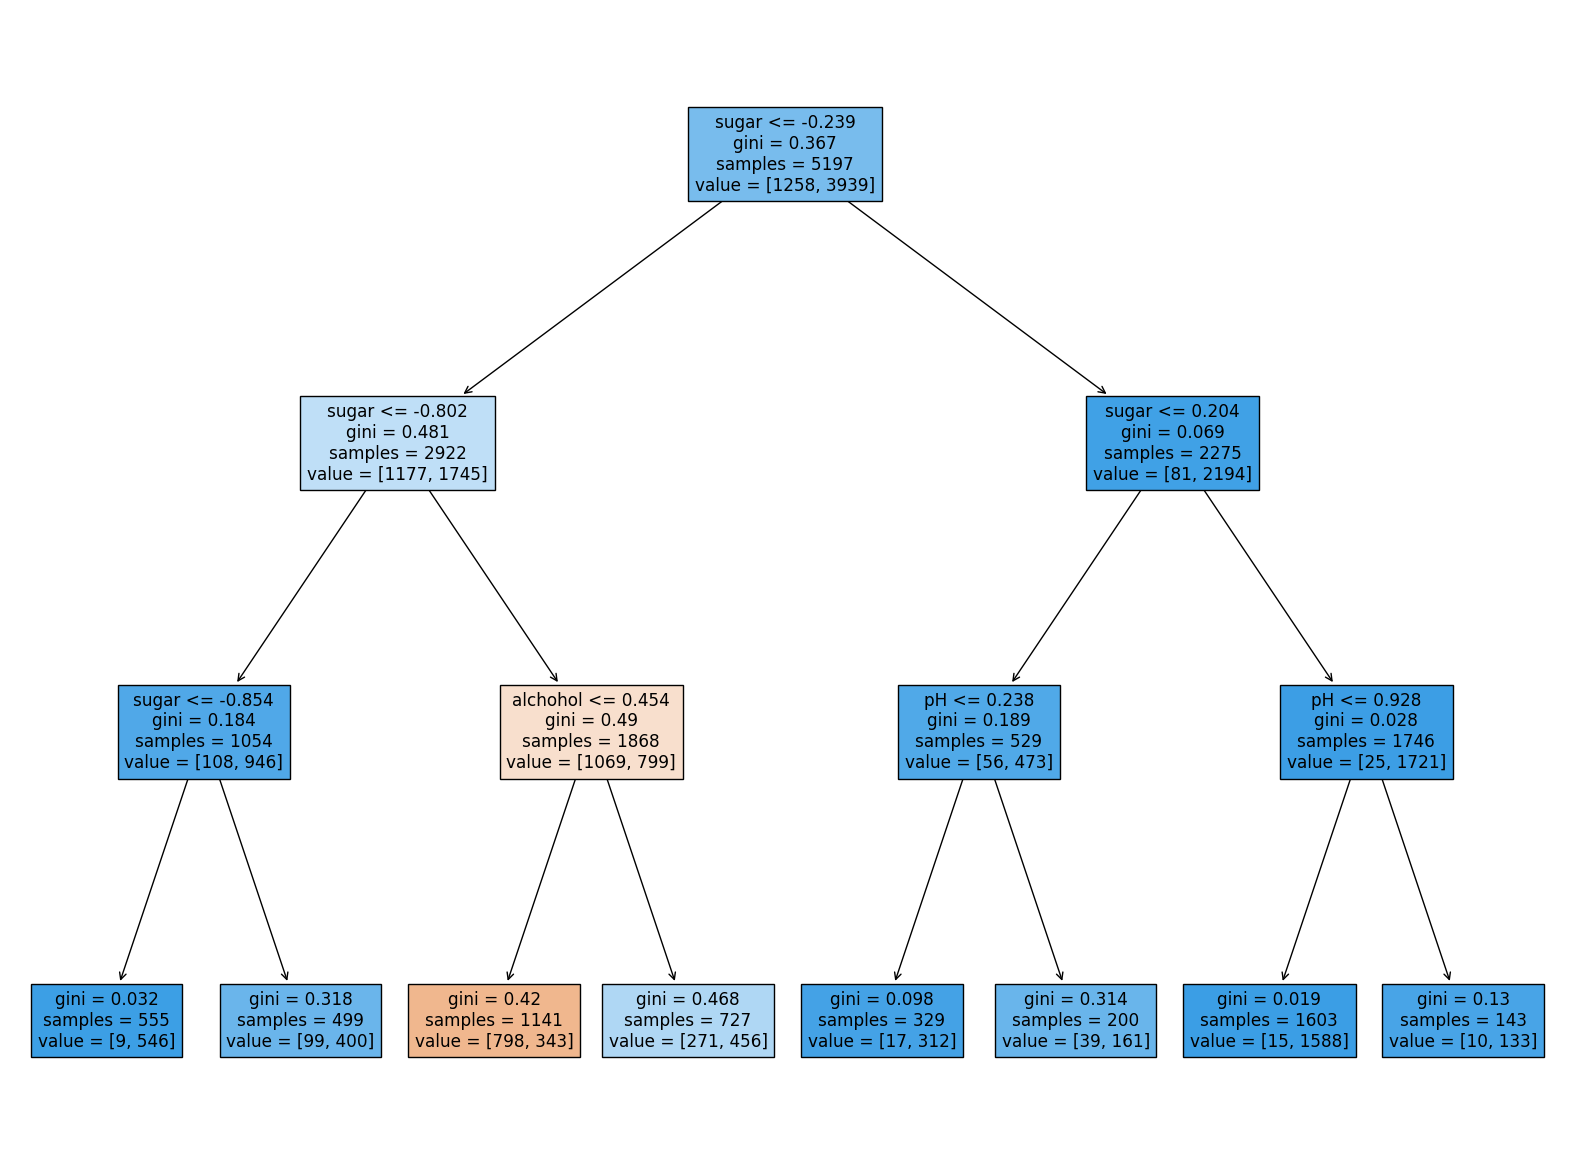

In [23]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchohol', 'sugar', 'pH'])
plt.show()

In [25]:
# 불순도는 클래스별 비율을 가지고 계산
# 샘플은 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일이 계산에 영향은 미치나? -> 아니다.
# 그래서 특성값의 스케일은 결정 트리알고리즘에 아무런 영향을 미치지 않는다. -> 표준화 전처리가 필요없다 -> 결정트리의 장점
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


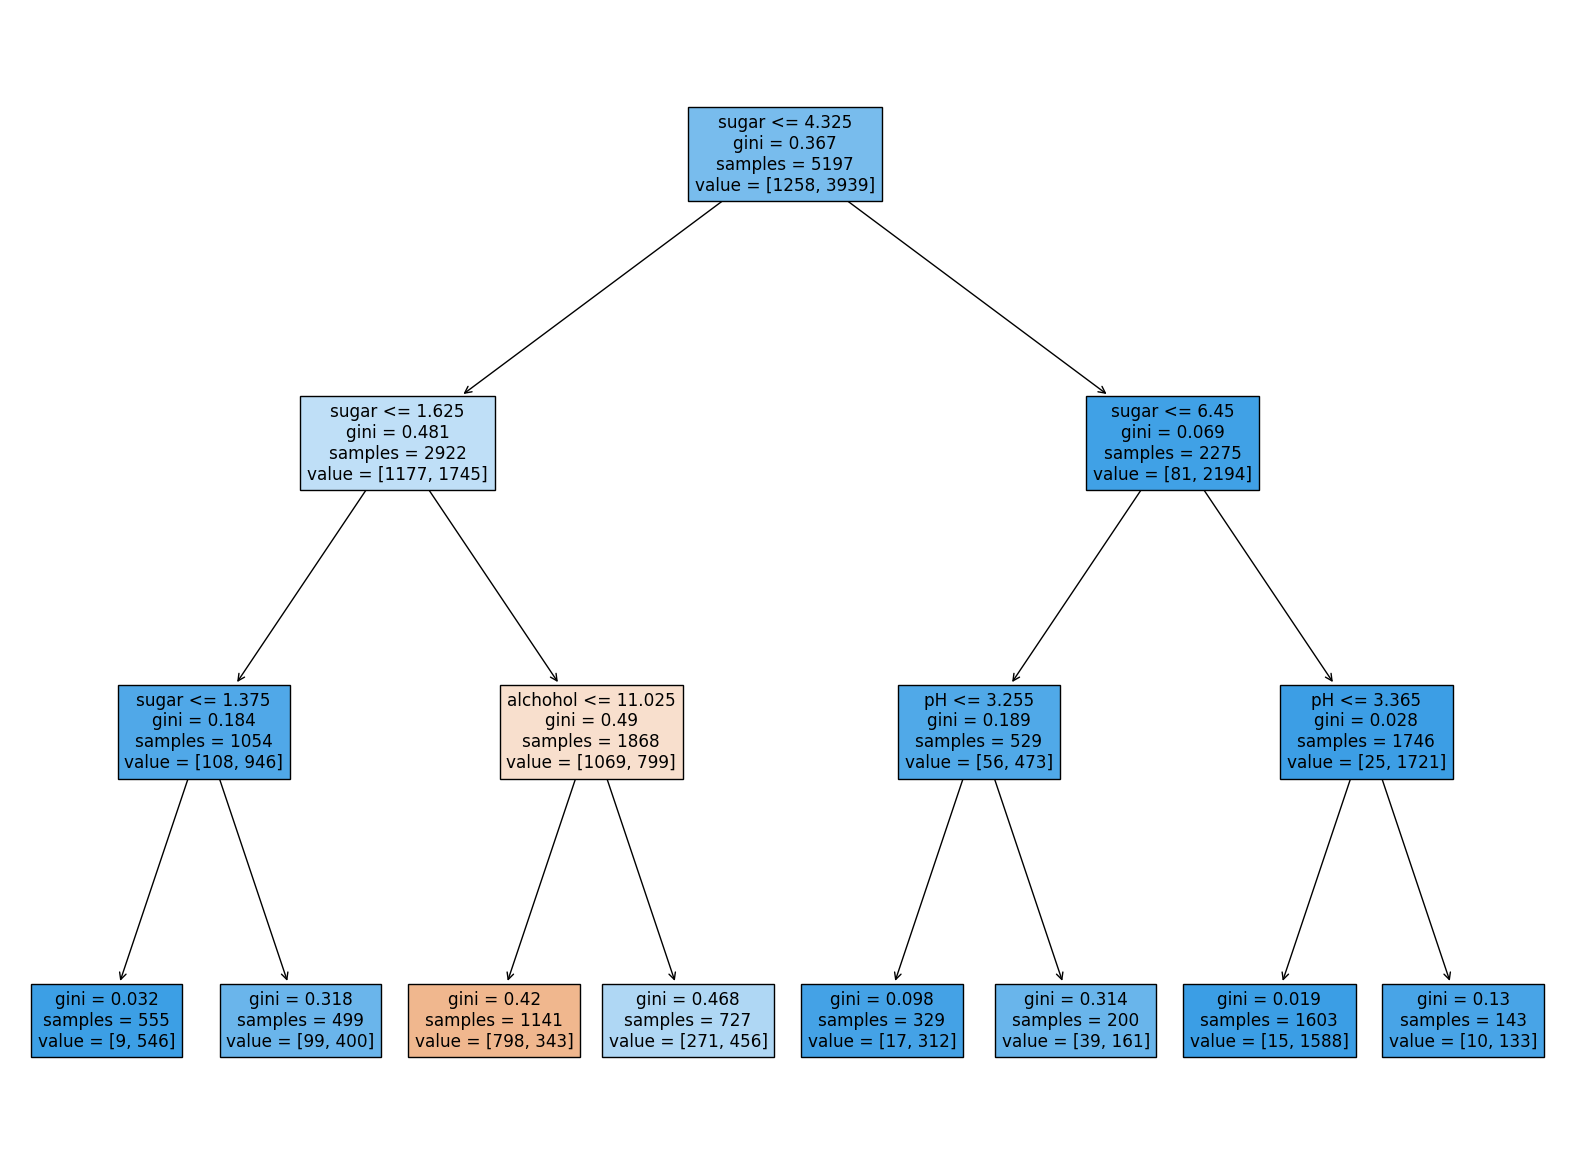

In [26]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchohol', 'sugar', 'pH'])
plt.show()
# 당도가 1.625보다 크고 4.325보다 작은 와인 중에 알코올 도수가 11.025보다 같거나 작은 것이 레드와인

In [28]:
# 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성중요도를 계산
# 루트 노드와 깊이 1에서 당도를 사용했기 때문에 아마 당도가 가장 유용한 특성으로 보임
# feature_importances_ 속성으로 확인 가능
print(dt.feature_importances_)
# 두번째 특성인 당도가 0.87로 중요도가 높음
# 아래 값을 모두 더하면 1이 된다.

[0.12345626 0.86862934 0.0079144 ]
